In [4]:
import glob
import os
import itertools
from pathlib import Path
from collections import defaultdict, OrderedDict

import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mne
import mne_bids

from scipy.stats import ttest_1samp, median_abs_deviation
from statsmodels.stats.multitest import fdrcorrection
from tqdm import tqdm
from natsort import natsorted

# from results import get_results

In [5]:
REPORTS = Path("home/srijith/Research/pred")


bids_path = mne_bids.BIDSPath(
    subject="01", session="0", task="0", datatype="meg", root="./"
)

raw = mne_bids.read_raw_bids(bids_path).load_data()

FileNotFoundError: [Errno 2] No such file or directory: 'sub-01/ses-0/meg'

In [34]:
def get_results(reports, feat, layer, subject):
    
    if subject == "all":
        subject = [str(f.name).split("-")[1] for f in reports.glob("sub-*")]
    elif isinstance(subject, str):
        subject = [subject]
    subject = sorted([str(s).zfill(2) for s in subject])
    
    if feat == "all":
        feat = []
        for s in subject:
            feat += [
                        "_".join(str(f.name).split("_")[:-1]) 
                        for f in reports.glob(f"meg_sub{s}_predictions/*")
                    ]
        feat = np.unique(feat)
 
    elif isinstance(feat, str):
        feat = [feat]
    
    if layer == "all":
        layer = np.arange(0, 12)
    elif isinstance(layer, int):
        layer = [layer]
        
    all_comb = itertools.product(subject, feat, layer)
    print(feat)
    results = []
    for sub, f, l in all_comb:
        
        if "concat" in f:
            results_dir = reports / f"meg_sub{sub}_predictions" / f"{f}_layer{l}_s{sub}_predictions"
        else:
            results_dir = reports / f"meg_sub{sub}_predictions" / f"{f}_predictions"
            
        
        if not (results_dir / f"{l}_corr.npy").exists():
            #print(f"Not found: {results_dir / 'norm_corr.npy'}")
            continue

        comb_res = {"feat": f,
                       "sub": int(sub),
                       "layer": l,
                       "corr": np.nan,
                       "r2": np.nan
                    }
        
        try:
            corr = np.load(results_dir / f"{l}_corr.npy")
            comb_res["corr"] = corr
        except Exception as e:
            print(e)
            
        try:
            r2 = np.load(results_dir / f"{l}_r2s.npy")
            comb_res["r2"] = r2
        except Exception as e:
            print(e)
            
        results.append(comb_res)

    return pd.DataFrame(results) 

In [35]:
rdf = get_results(REPORTS, "all", "all", "all")

['' 'apc_meg_1' 'articulation' 'bert_residual_syntax_lh_contrege_complete'
 'bert_residual_syntax_lh_contrege_incomplete'
 'bert_residual_syntax_lh_incontrege' 'contrege_complete'
 'contrege_incomplete' 'data2vec_meg_1' 'data2vec_meg_1_context2'
 'data2vec_meg_1_context2_c2' 'data2vec_meg_1_context3'
 'data2vec_meg_1_context3_c2' 'data2vec_meg_1_prepost' 'data2vec_meg_1_pw'
 'data2vec_residual_speech' 'data2vec_residual_speech_phonation'
 'data2vec_residual_speech_phonology' 'fbank_meg_1' 'gpt2-base-lw-1'
 'hubert_meg_1' 'hubert_meg_1_context2_c2' 'hubert_meg_1_context3'
 'hubert_meg_1_pw' 'incontrege' 'mel_meg_1' 'mfcc_meg_1' 'phonation'
 'phonological' 'prosody' 'wav2vec_meg_1' 'wav2vec_meg_1_context2'
 'wav2vec_meg_1_context3_w2v' 'wav2vec_meg_1_pw' 'wav2vec_meg_1_w2v']
[Errno 2] No such file or directory: 'meg_sub01_predictions/articulation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub01_predictions/data2vec_residual_speech_phonation_predictions/0_r2s.npy'
[E

[Errno 2] No such file or directory: 'meg_sub04_predictions/contrege_incomplete_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_residual_speech_phonation_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub04_predictions/data2vec_re

[Errno 2] No such file or directory: 'meg_sub06_predictions/incontrege_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub06_predictions/phonation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub06_predictions/phonological_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub06_predictions/prosody_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/articulation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/contrege_complete_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/contrege_incomplete_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/data2vec_residual_speech_phonation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/data2vec_residual_speech_phonation_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub07_predictions/data2vec_residual_speech_phona

[Errno 2] No such file or directory: 'meg_sub09_predictions/incontrege_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub09_predictions/phonation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub09_predictions/phonological_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub09_predictions/prosody_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/articulation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/contrege_complete_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/contrege_incomplete_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/incontrege_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/phonation_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub10_predictions/phonological_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_s

[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/7_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/8_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub14_predictions/hubert_meg_1_predictions/9_r2s.npy'
[Errno 2] No such file or directory: 'me

[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/7_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/8_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub17_predictions/hubert_meg_1_predictions/9_r2s.npy'
[Errno 2] No such file or directory: 'me

[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/7_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/8_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub20_predictions/hubert_meg_1_predictions/9_r2s.npy'
[Errno 2] No such file or directory: 'me

[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/7_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/8_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub22_predictions/hubert_meg_1_predictions/9_r2s.npy'
[Errno 2] No such file or directory: 'me

[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/0_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/1_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/2_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/3_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/4_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/5_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/6_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/7_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/8_r2s.npy'
[Errno 2] No such file or directory: 'meg_sub24_predictions/hubert_meg_1_predictions/9_r2s.npy'
[Errno 2] No such file or directory: 'me

In [36]:
rdf['feat']

0                                    articulation
1       bert_residual_syntax_lh_contrege_complete
2       bert_residual_syntax_lh_contrege_complete
3       bert_residual_syntax_lh_contrege_complete
4       bert_residual_syntax_lh_contrege_complete
                          ...                    
6339                            wav2vec_meg_1_w2v
6340                            wav2vec_meg_1_w2v
6341                            wav2vec_meg_1_w2v
6342                            wav2vec_meg_1_w2v
6343                            wav2vec_meg_1_w2v
Name: feat, Length: 6344, dtype: object

In [37]:
rdf["feat"].unique()

array(['articulation', 'bert_residual_syntax_lh_contrege_complete',
       'bert_residual_syntax_lh_contrege_incomplete',
       'bert_residual_syntax_lh_incontrege', 'contrege_complete',
       'contrege_incomplete', 'data2vec_meg_1', 'data2vec_meg_1_context2',
       'data2vec_meg_1_context2_c2', 'data2vec_meg_1_context3',
       'data2vec_meg_1_context3_c2', 'data2vec_meg_1_prepost',
       'data2vec_meg_1_pw', 'data2vec_residual_speech_phonation',
       'data2vec_residual_speech_phonology', 'fbank_meg_1',
       'gpt2-base-lw-1', 'hubert_meg_1', 'hubert_meg_1_context2_c2',
       'hubert_meg_1_context3', 'hubert_meg_1_pw', 'incontrege',
       'mel_meg_1', 'mfcc_meg_1', 'phonation', 'phonological', 'prosody',
       'wav2vec_meg_1', 'wav2vec_meg_1_context2',
       'wav2vec_meg_1_context3_w2v', 'wav2vec_meg_1_pw',
       'wav2vec_meg_1_w2v', 'apc_meg_1'], dtype=object)

In [38]:
def get_noise_ceiling(data, subject):
    
    if subject == "all":
        subject = [str(f.name).split("_")[1] for f in data.glob("subject_*")]
    elif isinstance(subject, str):
        subject = [subject]
    
    subject = natsorted([str(s).zfill(2) for s in subject])
    
    ceilings = []
    for sub in subject:
        noise_ceiling = np.load(data / f"subject_{int(sub)}_kernel_ridge.npy")
        ceilings.append({"nc": noise_ceiling})
    
    return pd.DataFrame(ceilings)

## Significant timing/sensors selection

In [39]:
DATA = Path("./predictions_results_meg/")
ncdf = get_noise_ceiling(DATA, "all")
ncs = np.vstack(ncdf["nc"])

In [40]:
def fisher(x):
    return np.arctanh(x)

def inv_fisher(z):
    return np.tanh(z)

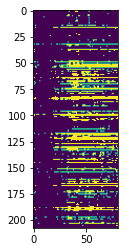

In [41]:
alpha = 0.01

s, p = ttest_1samp(fisher(ncs), 0.0, alternative="greater")
r, p_corrected = fdrcorrection(p, alpha=alpha)

plt.imshow((p_corrected < alpha).reshape(208, 81))
plt.show()

non_rois = np.where(p_corrected >= alpha)
rois = np.where(p_corrected < alpha)

## Median correlation, subject-wise (for significant timings/sensors)

In [43]:
def median_ncorr(df, ncs, feat, layer, rois):
    corr = df.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["corr"].values
    #nc = ncs.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["nc"].values

    corr = np.concatenate([arr[:, np.newaxis] for arr in corr], axis=1)[:, :, 0]
    #nc = np.concatenate([arr[:, np.newaxis] for arr in nc], axis=1)
    #print(corr.shape)
    ncorr = corr / ncs.T
    ncorr = np.clip(ncorr, -1.0, 1.0)
    ncorr[non_rois] = 0.0

    return np.percentile(ncorr[rois],60, axis=0) # median of sensors/timepoints

### BERT1-20

In [44]:
medians = list()
med_dict = list()
#feats = ['bert_residual_syntax_lh_contrege_complete','bert_residual_syntax_lh_contrege_incomplete','bert_residual_syntax_lh_incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
feats = ['gpt2-base-lw-1','data2vec_meg_1', 'data2vec_meg_1_context2_c2','data2vec_meg_1_context3_c2', 'hubert_meg_1', 'hubert_meg_1_context2_c2','hubert_meg_1_context3', 'wav2vec_meg_1', 'hubert_meg_1_pw', 'data2vec_meg_1_pw','wav2vec_meg_1_pw', 'wav2vec_meg_1_w2v', 'wav2vec_meg_1_context2', 'wav2vec_meg_1_context3_w2v']
layers = rdf["layer"].unique()
print(layers)
for feat in feats:
    med = []
    for layer in layers:
        m = median_ncorr(rdf, ncs, feat, layer, rois)
        med.append(m)
        
        for mm in m:
            med_d = dict()

            med_d["median"] = mm
            med_d["layer"] = layer
            med_d["feat"] = feat
            med_dict.append(med_d)
        

    medians.append(med)
    
medians = np.array(medians)
mdf = pd.DataFrame(med_dict)
mdf

[ 0  1  2  3  4  5  6  7  8  9 10 11]


,median,layer,feat
0,1.000000,0,gpt2-base-lw-1
1,1.000000,0,gpt2-base-lw-1
2,1.000000,0,gpt2-base-lw-1
3,1.000000,0,gpt2-base-lw-1
4,1.000000,0,gpt2-base-lw-1
...,...,...,...
4531,0.343405,11,wav2vec_meg_1_context3_w2v
4532,-0.967971,11,wav2vec_meg_1_context3_w2v
4533,0.522204,11,wav2vec_meg_1_context3_w2v
4534,0.817928,11,wav2vec_meg_1_context3_w2v


In [45]:
mdf['feat'][mdf.feat=='gpt2-base-lw-1']='GPT2'
mdf['feat'][mdf.feat=='wav2vec_meg_1_w2v']='Wav2Vec2.0'
mdf['feat'][mdf.feat=='wav2vec_meg_1_context2']='Wav2Vec2.0-Context2'
mdf['feat'][mdf.feat=='wav2vec_meg_1_context3_w2v']='Wav2Vec2.0-Context3'
mdf['feat'][mdf.feat=='data2vec_meg_1_context2_c2']='Data2Vec-Context2'
mdf['feat'][mdf.feat=='hubert_meg_1_context2_c2']='HuBERT-Context2'
mdf['feat'][mdf.feat=='hubert_meg_1_context3']='HuBERT-Context3'
mdf['feat'][mdf.feat=='data2vec_meg_1_context3_c2']='Data2Vec-Context3'
mdf['feat'][mdf.feat=='data2vec_meg_1']='Data2Vec'
mdf['feat'][mdf.feat=='data2vec_meg_1_pw']='Data2Vec ($W_{t-1}$)'
mdf['feat'][mdf.feat=='hubert_meg_1']='HuBERT'
mdf['feat'][mdf.feat=='hubert_meg_1_pw']='HuBERT ($W_{t-1}$)'
mdf['feat'][mdf.feat=='wav2vec_meg_1_pw']='Wav2Vec2.0 ($W_{t-1}$)'

<ipython-input-45-b3eea534af4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='gpt2-base-lw-1']='GPT2'
<ipython-input-45-b3eea534af4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='wav2vec_meg_1_w2v']='Wav2Vec2.0'
<ipython-input-45-b3eea534af4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='wav2vec_meg_1_context2']='Wav2Vec2.0-Context2'
<ipython-input-45-b3eea

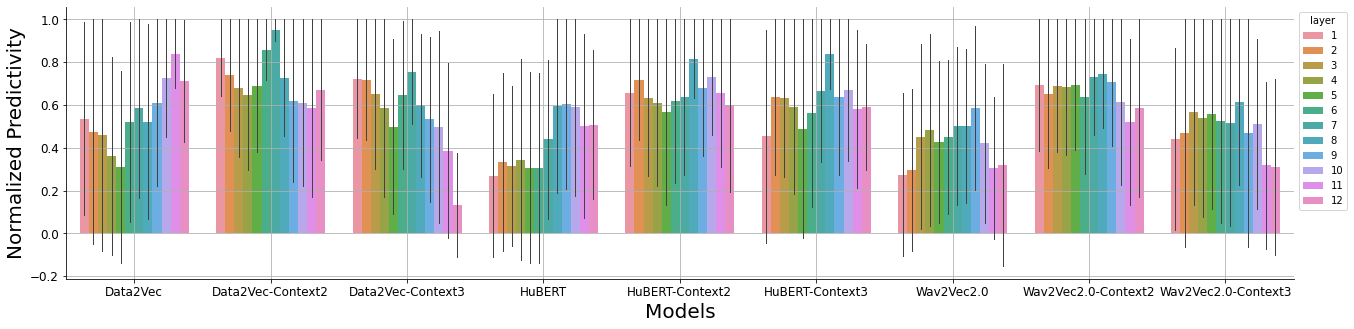

In [98]:
plt.figure(figsize=(22,5))
newdf = mdf[ (mdf.feat=='Wav2Vec2.0') | (mdf.feat=='Wav2Vec2.0-Context2')| (mdf.feat=='Data2Vec') | (mdf.feat=='Data2Vec-Context2')| (mdf.feat=='Data2Vec-Context3')| (mdf.feat=='HuBERT') | (mdf.feat=='HuBERT-Context2') | (mdf.feat=='HuBERT-Context3') | (mdf.feat=='Wav2Vec2.0-Context3')]
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=newdf["layer"]+1, dodge=True, data=newdf, estimator=med,errorbar=error, errwidth=1)
sns.despine()
ax.set(xlabel='Models', ylabel='Normalized Predictivity')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
plt.savefig("figures/sig_median_corr_sslmodels_context_all.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_context_all.pdf", bbox_inches="tight")
plt.show()

In [30]:
mdf['feat'][mdf.feat=='Wav2Vec2.0']='Wav2Vec2.0 ($W_{t}$)'
mdf['feat'][mdf.feat=='Data2Vec']='Data2Vec ($W_{t}$)'
mdf['feat'][mdf.feat=='HuBERT']='HuBERT ($W_{t}$)'
mdf['feat'][mdf.feat=='GPT2']='GPT2 ($W_{t}$)'

<ipython-input-30-c9c857f13f45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='Wav2Vec2.0']='Wav2Vec2.0 ($W_{t}$)'
<ipython-input-30-c9c857f13f45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='Data2Vec']='Data2Vec ($W_{t}$)'
<ipython-input-30-c9c857f13f45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='HuBERT']='HuBERT ($W_{t}$)'
<ipython-input-30-c9c857f13f45>

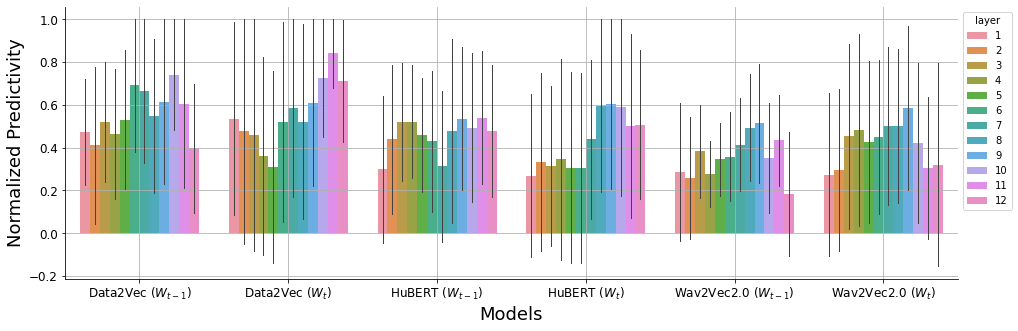

In [15]:
plt.figure(figsize=(16,5))
newdf = mdf[ (mdf.feat=='Data2Vec ($W_{t}$)') | (mdf.feat=='Data2Vec ($W_{t-1}$)') | (mdf.feat=='HuBERT ($W_{t}$)') | (mdf.feat=='HuBERT ($W_{t-1}$)') | (mdf.feat=='Wav2Vec2.0 ($W_{t}$)') | (mdf.feat=='Wav2Vec2.0 ($W_{t-1}$)')]
newdf = newdf.sort_values(by = "feat")
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=newdf["layer"]+1, dodge=True, data=newdf, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Models', ylabel='Normalized Predictivity')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_context_previous.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_context_previous.pdf", bbox_inches="tight")
plt.show()

In [ ]:
plt.figure(figsize=(16,5))
newdf = mdf[(mdf.feat=='GPT2 ($W_{t}$)') | (mdf.feat=='Data2Vec ($W_{t}$)') | (mdf.feat=='Data2Vec ($W_{t-1}$)') | (mdf.feat=='HuBERT ($W_{t}$)') | (mdf.feat=='HuBERT ($W_{t-1}$)') | (mdf.feat=='Wav2Vec2.0 ($W_{t}$)') | (mdf.feat=='Wav2Vec2.0 ($W_{t-1}$)')]
newdf = newdf.sort_values(by = "feat")
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=newdf["layer"]+1, dodge=True, data=newdf, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Models', ylabel='Normalized Predictivity')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_context_previous.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_context_previous.pdf", bbox_inches="tight")
plt.show()

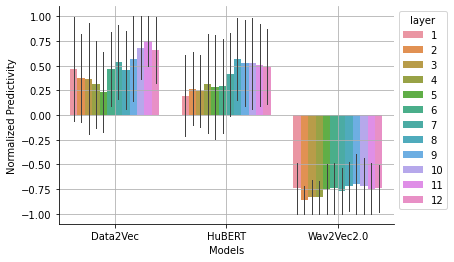

In [161]:
sslmodels = mdf[(mdf.feat=='Data2Vec') | (mdf.feat=='HuBERT') | (mdf.feat=='Wav2Vec2.0')]
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=sslmodels["layer"]+1, dodge=True, data=sslmodels, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Models', ylabel='Normalized Predictivity')
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_featwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_featwise.pdf", bbox_inches="tight")
plt.show()

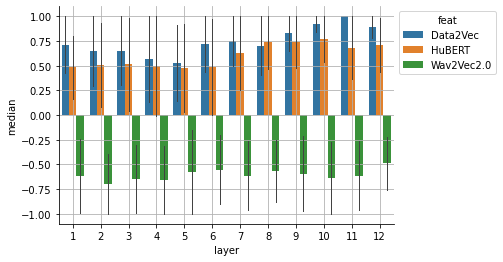

In [96]:
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x=sslmodels["layer"]+1, y="median", hue="feat", dodge=True, data=sslmodels, estimator=np.median,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_layerwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_layerwise.pdf", bbox_inches="tight")
plt.show()

# Single context vs 2-word context

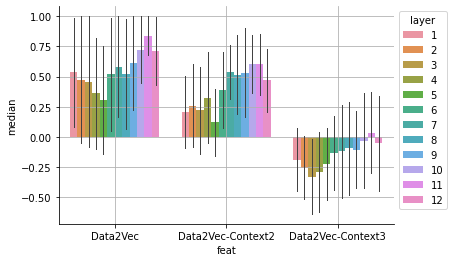

In [20]:
newdf = mdf[(mdf.feat=='Data2Vec') | (mdf.feat=='Data2Vec-Context2') | (mdf.feat=='Data2Vec-Context3')]
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=newdf["layer"]+1, dodge=True, data=newdf, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_context.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_context.pdf", bbox_inches="tight")
plt.show()

## Basic Features

In [368]:
def median_ncorr_basic(df, ncs, feat, layer, rois):
    corr = df.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["corr"].values
    #nc = ncs.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["nc"].values

    corr = np.concatenate([arr[:, np.newaxis] for arr in corr], axis=1)[:, :, 0]
    #nc = np.concatenate([arr[:, np.newaxis] for arr in nc], axis=1)
    ncorr = corr[:,:20] / ncs.T[:,:20]
    ncorr = np.clip(ncorr, -1.0, 1.0)
    ncorr[non_rois] = 0.0

    return np.percentile(ncorr[rois],60, axis=0) # median of sensors/timepoints

In [369]:
medians = list()
med_dict = list()
feats = ["articulation", 'phonation', 'phonological', 'fbank_meg_1', 'mel_meg_1', 'mfcc_meg_1']
layers = rdf["layer"].unique()

for feat in feats:
    print(feat)
    med = []
    for layer in layers[0:1]:
        m = median_ncorr_basic(rdf, ncs, feat, layer, rois)
        med.append(m)
        
        for mm in m:
            med_d = dict()

            med_d["median"] = mm
            med_d["layer"] = layer
            med_d["feat"] = feat
            med_dict.append(med_d)
        

    medians.append(med)
    
medians = np.array(medians)
mdf = pd.DataFrame(med_dict)
mdf

articulation
phonation
phonological
fbank_meg_1
mel_meg_1
mfcc_meg_1


,median,layer,feat
0,-0.830144,0,articulation
1,-0.719902,0,articulation
2,-0.860002,0,articulation
3,-0.367419,0,articulation
4,-0.677262,0,articulation
...,...,...,...
115,-0.832120,0,mfcc_meg_1
116,-0.151532,0,mfcc_meg_1
117,0.431490,0,mfcc_meg_1
118,0.084996,0,mfcc_meg_1


In [370]:
mdf['feat'][mdf.feat=='articulation']='Articulation'
mdf['feat'][mdf.feat=='phonation']='Phonation'
mdf['feat'][mdf.feat=='phonological']='Phonological'
mdf['feat'][mdf.feat=='fbank_meg_1']='fbank'
mdf['feat'][mdf.feat=='mel_meg_1']='Mel'
mdf['feat'][mdf.feat=='mfcc_meg_1']='MFCC'

<ipython-input-370-e04038ddf4f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='articulation']='Articulation'
<ipython-input-370-e04038ddf4f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='phonation']='Phonation'
<ipython-input-370-e04038ddf4f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdf['feat'][mdf.feat=='phonological']='Phonological'
<ipython-input-370-e04038ddf4f4>:4: Sett

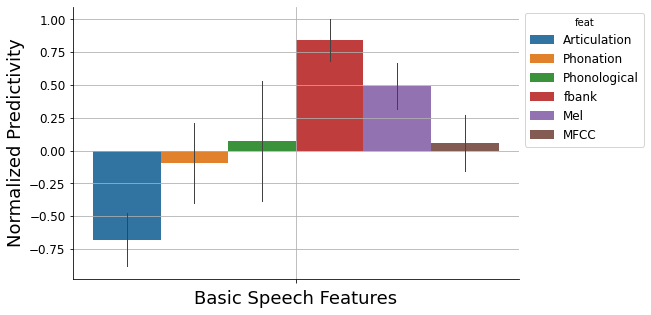

In [402]:
plt.figure(figsize=(8,5))
plt.rc('legend',fontsize=12)
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x=mdf["layer"]+1, y="median", hue="feat", dodge=True, data=mdf, estimator=np.median, errorbar=error, errwidth=1)
ax.set(xlabel='Basic Speech', ylabel='Median')
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

ax.set(xlabel='Basic Speech Features', ylabel='Normalized Predictivity')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.set_xticklabels((''))
ax.autoscale_view()
plt.grid()
plt.savefig("figures/sig_median_corr_speechbase_layerwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_speechbase_layerwise.pdf", bbox_inches="tight")
plt.show()

In [27]:
def median_ncorr_time(df, ncs, feat, layer, rois):
    corr = df.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["corr"].values
    #nc = ncs.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["nc"].values

    corr = np.concatenate([arr[:, np.newaxis] for arr in corr], axis=1)[:, :, 0]
    #nc = np.concatenate([arr[:, np.newaxis] for arr in nc], axis=1)
    ncorr = corr / ncs.T
    ncorr = np.clip(ncorr, -1.0, 1.0)
    ncorr[non_rois] = 0.0
    nncorr = ncorr[rois]
    finalcorr = []
    for time in np.arange(81):
        #finalcorr.append(nncorr[time*208:(time+1):208,:][((rois[0]>time*208) & (rois[0]<(time+1)*208))[]])
        try:
            finalcorr.append(np.percentile(nncorr[np.where(((rois[0]>time*208) & (rois[0]<(time+1)*208))==True)[0],:],62,axis=0))
        except:
            finalcorr.append(np.zeros(27))
    finalcorr = np.array(finalcorr)
    
    return finalcorr # median of sensors/timepoints

In [102]:
medians = list()
med_dict = list()
#feats = ['bert_residual_syntax_lh_contrege_complete','bert_residual_syntax_lh_contrege_incomplete','bert_residual_syntax_lh_incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
feats = ['data2vec_meg_1','hubert_meg_1','wav2vec_meg_1']
layers = rdf["layer"].unique()
print(layers)
for feat in feats:
    med = []
    for layer in layers:
        m = median_ncorr_time(rdf, ncs, feat, layer, rois)
        med.append(m)
        time = 0
        for mm in m:
            med_d = dict()

            med_d["median"] = np.median(mm)
            med_d["layer"] = layer
            med_d["time"] = time
            med_d["feat"] = feat
            med_dict.append(med_d)
            time+=1
        

    medians.append(med)
    
medians = np.array(medians)
mdf = pd.DataFrame(med_dict)
mdf

[ 0  1  2  3  4  5  6  7  8  9 10 11]


,median,layer,time,feat
0,0.255033,0,0,data2vec_meg_1
1,-0.660077,0,1,data2vec_meg_1
2,-0.696870,0,2,data2vec_meg_1
3,-0.444179,0,3,data2vec_meg_1
4,-0.032931,0,4,data2vec_meg_1
...,...,...,...,...
2911,-0.865482,11,76,wav2vec_meg_1
2912,-0.809042,11,77,wav2vec_meg_1
2913,-0.809942,11,78,wav2vec_meg_1
2914,-0.705674,11,79,wav2vec_meg_1


In [105]:
data2vec = mdf[mdf.feat=='data2vec_meg_1']
data2vec = data2vec[data2vec.time>20]
data2vec.reset_index(drop=True, inplace=True)

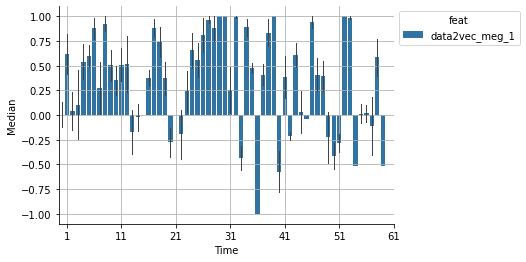

In [106]:
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x=data2vec["time"]+1, y="median", hue="feat", dodge=True, data=data2vec, estimator=np.median, errorbar=error, errwidth=1)
ax.set(xlabel='Time', ylabel='Median')
ax.set_xticks(range(1,62,10), labels =range(1,62, 10))
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.savefig("figures/sig_median_corr_speechtime_layerwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_speechtime_layerwise.pdf", bbox_inches="tight")
plt.show()

In [24]:
def median_ncorr(df, ncs, feat, layer, rois):
    corr = df.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["corr"].values
    #nc = ncs.set_index(["feat", "layer"]).sort_index().loc[feat, layer]["nc"].values

    corr = np.concatenate([arr[:, np.newaxis] for arr in corr], axis=1)[:, :, 0]
    #nc = np.concatenate([arr[:, np.newaxis] for arr in nc], axis=1)
    ncorr = corr[:,0:26] / ncs.T[:,0:26]
    #ncorr = np.clip(ncorr, -1.0, 1.0)
    ncorr[non_rois] = 0.0

    return np.percentile(ncorr[rois],65, axis=0) # median of sensors/timepoints

In [25]:
medians = list()
med_dict = list()
#feats = ['bert_residual_syntax_lh_contrege_complete','bert_residual_syntax_lh_contrege_incomplete','bert_residual_syntax_lh_incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
#feats = ['contrege_complete','contrege_incomplete','incontrege']
feats = ['data2vec_residual_speech_phonation','data2vec_residual_speech_phonology']
layers = rdf["layer"].unique()
print(layers)
for feat in feats:
    med = []
    for layer in layers:
        m = median_ncorr(rdf, ncs, feat, layer, rois)
        med.append(m)
        
        for mm in m:
            med_d = dict()

            med_d["median"] = mm
            med_d["layer"] = layer
            med_d["feat"] = feat
            med_dict.append(med_d)
        

    medians.append(med)
    
medians = np.array(medians)
mdf = pd.DataFrame(med_dict)
mdf

[ 0  1  2  3  4  5  6  7  8  9 10 11]


,median,layer,feat
0,0.414179,0,data2vec_residual_speech_phonation
1,0.423354,0,data2vec_residual_speech_phonation
2,-0.103763,0,data2vec_residual_speech_phonation
3,0.076096,0,data2vec_residual_speech_phonation
4,0.167049,0,data2vec_residual_speech_phonation
...,...,...,...
619,0.555957,11,data2vec_residual_speech_phonology
620,0.361605,11,data2vec_residual_speech_phonology
621,-0.635678,11,data2vec_residual_speech_phonology
622,-0.183101,11,data2vec_residual_speech_phonology


<ipython-input-26-101701e874f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resid['feat'][resid.feat=='data2vec_residual_speech_phonation']='{Data2Vec}-{Phonation}'
<ipython-input-26-101701e874f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resid['feat'][resid.feat=='data2vec_residual_speech_phonology']='{Data2Vec}-{Phonological}'


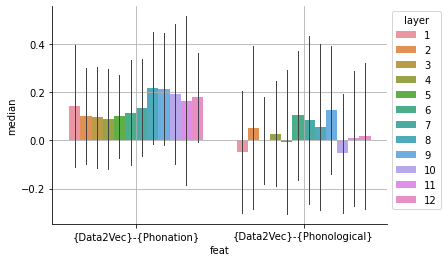

In [26]:
resid = mdf
resid['feat'][resid.feat=='data2vec_residual_speech_phonation']='{Data2Vec}-{Phonation}'
resid['feat'][resid.feat=='data2vec_residual_speech_phonology']='{Data2Vec}-{Phonological}'
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=resid["layer"]+1, dodge=True, data=resid, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.savefig("figures/sig_median_corr_sslmodels_residuals.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_sslmodels_residuals.pdf", bbox_inches="tight")
plt.show()

## Lag

In [46]:
medians = list()
med_dict = list()
feats = ['bert_lag_5_3',  'bert_lag_5_2', 'bert_lag_5_1', 'bert_5', 'bert_rh_lag_5_1', 'bert_rh_lag_5_2',
         'bert_rh_lag_5_3']
layers = rdf["layer"].unique()

for feat in feats:
    med = []
    for layer in layers:
        m = median_ncorr(rdf, ncs, feat, layer, rois)
        med.append(m)
        
        for mm in m:
            med_d = dict()

            med_d["median"] = mm
            med_d["layer"] = layer
            med_d["feat"] = feat
            med_dict.append(med_d)
        

    medians.append(med)
    
medians = np.array(medians)
mdf = pd.DataFrame(med_dict)
mdf

,median,layer,feat
0,-0.464818,0,bert_lag_5_3
1,-0.191551,0,bert_lag_5_3
2,0.007125,0,bert_lag_5_3
3,-0.078149,0,bert_lag_5_3
4,-0.018452,0,bert_lag_5_3
...,...,...,...
2263,-0.067695,11,bert_rh_lag_5_3
2264,-0.000352,11,bert_rh_lag_5_3
2265,-0.041009,11,bert_rh_lag_5_3
2266,-0.275904,11,bert_rh_lag_5_3


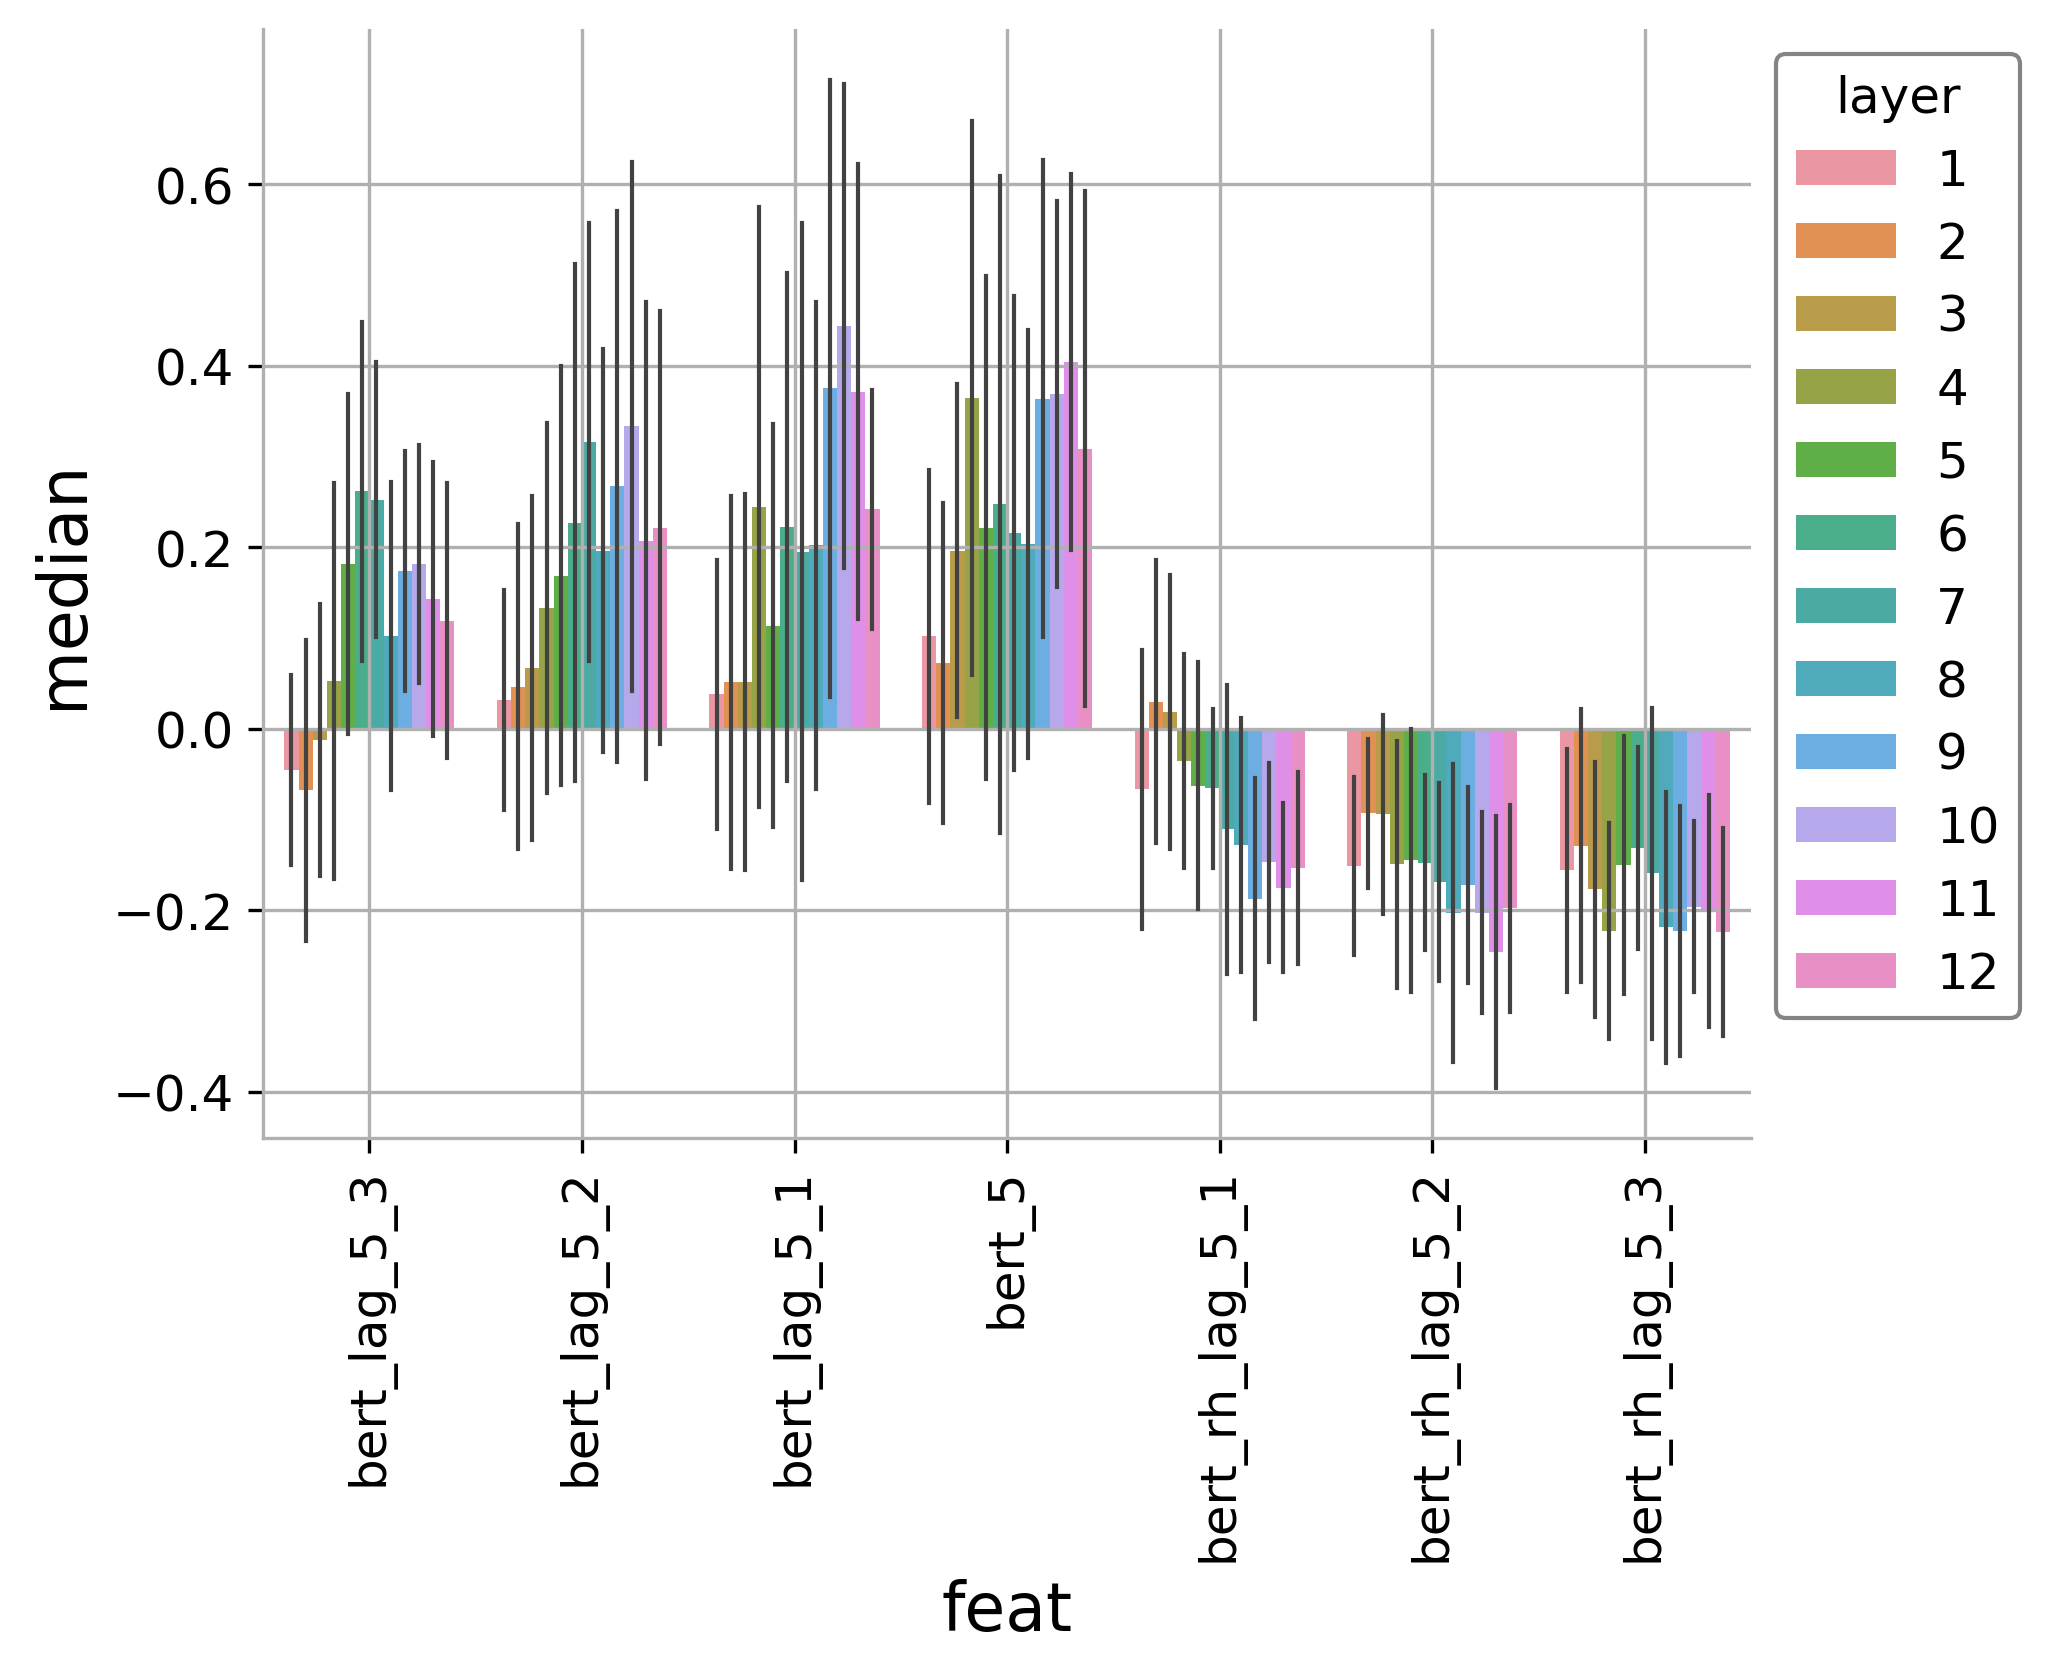

In [47]:
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=mdf["layer"]+1, dodge=True, data=mdf, estimator=med, errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.xticks(rotation=90)
plt.savefig("figures/sig_median_corr_bert-lag_featwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_bert-lag_featwise.pdf", bbox_inches="tight")
plt.show()

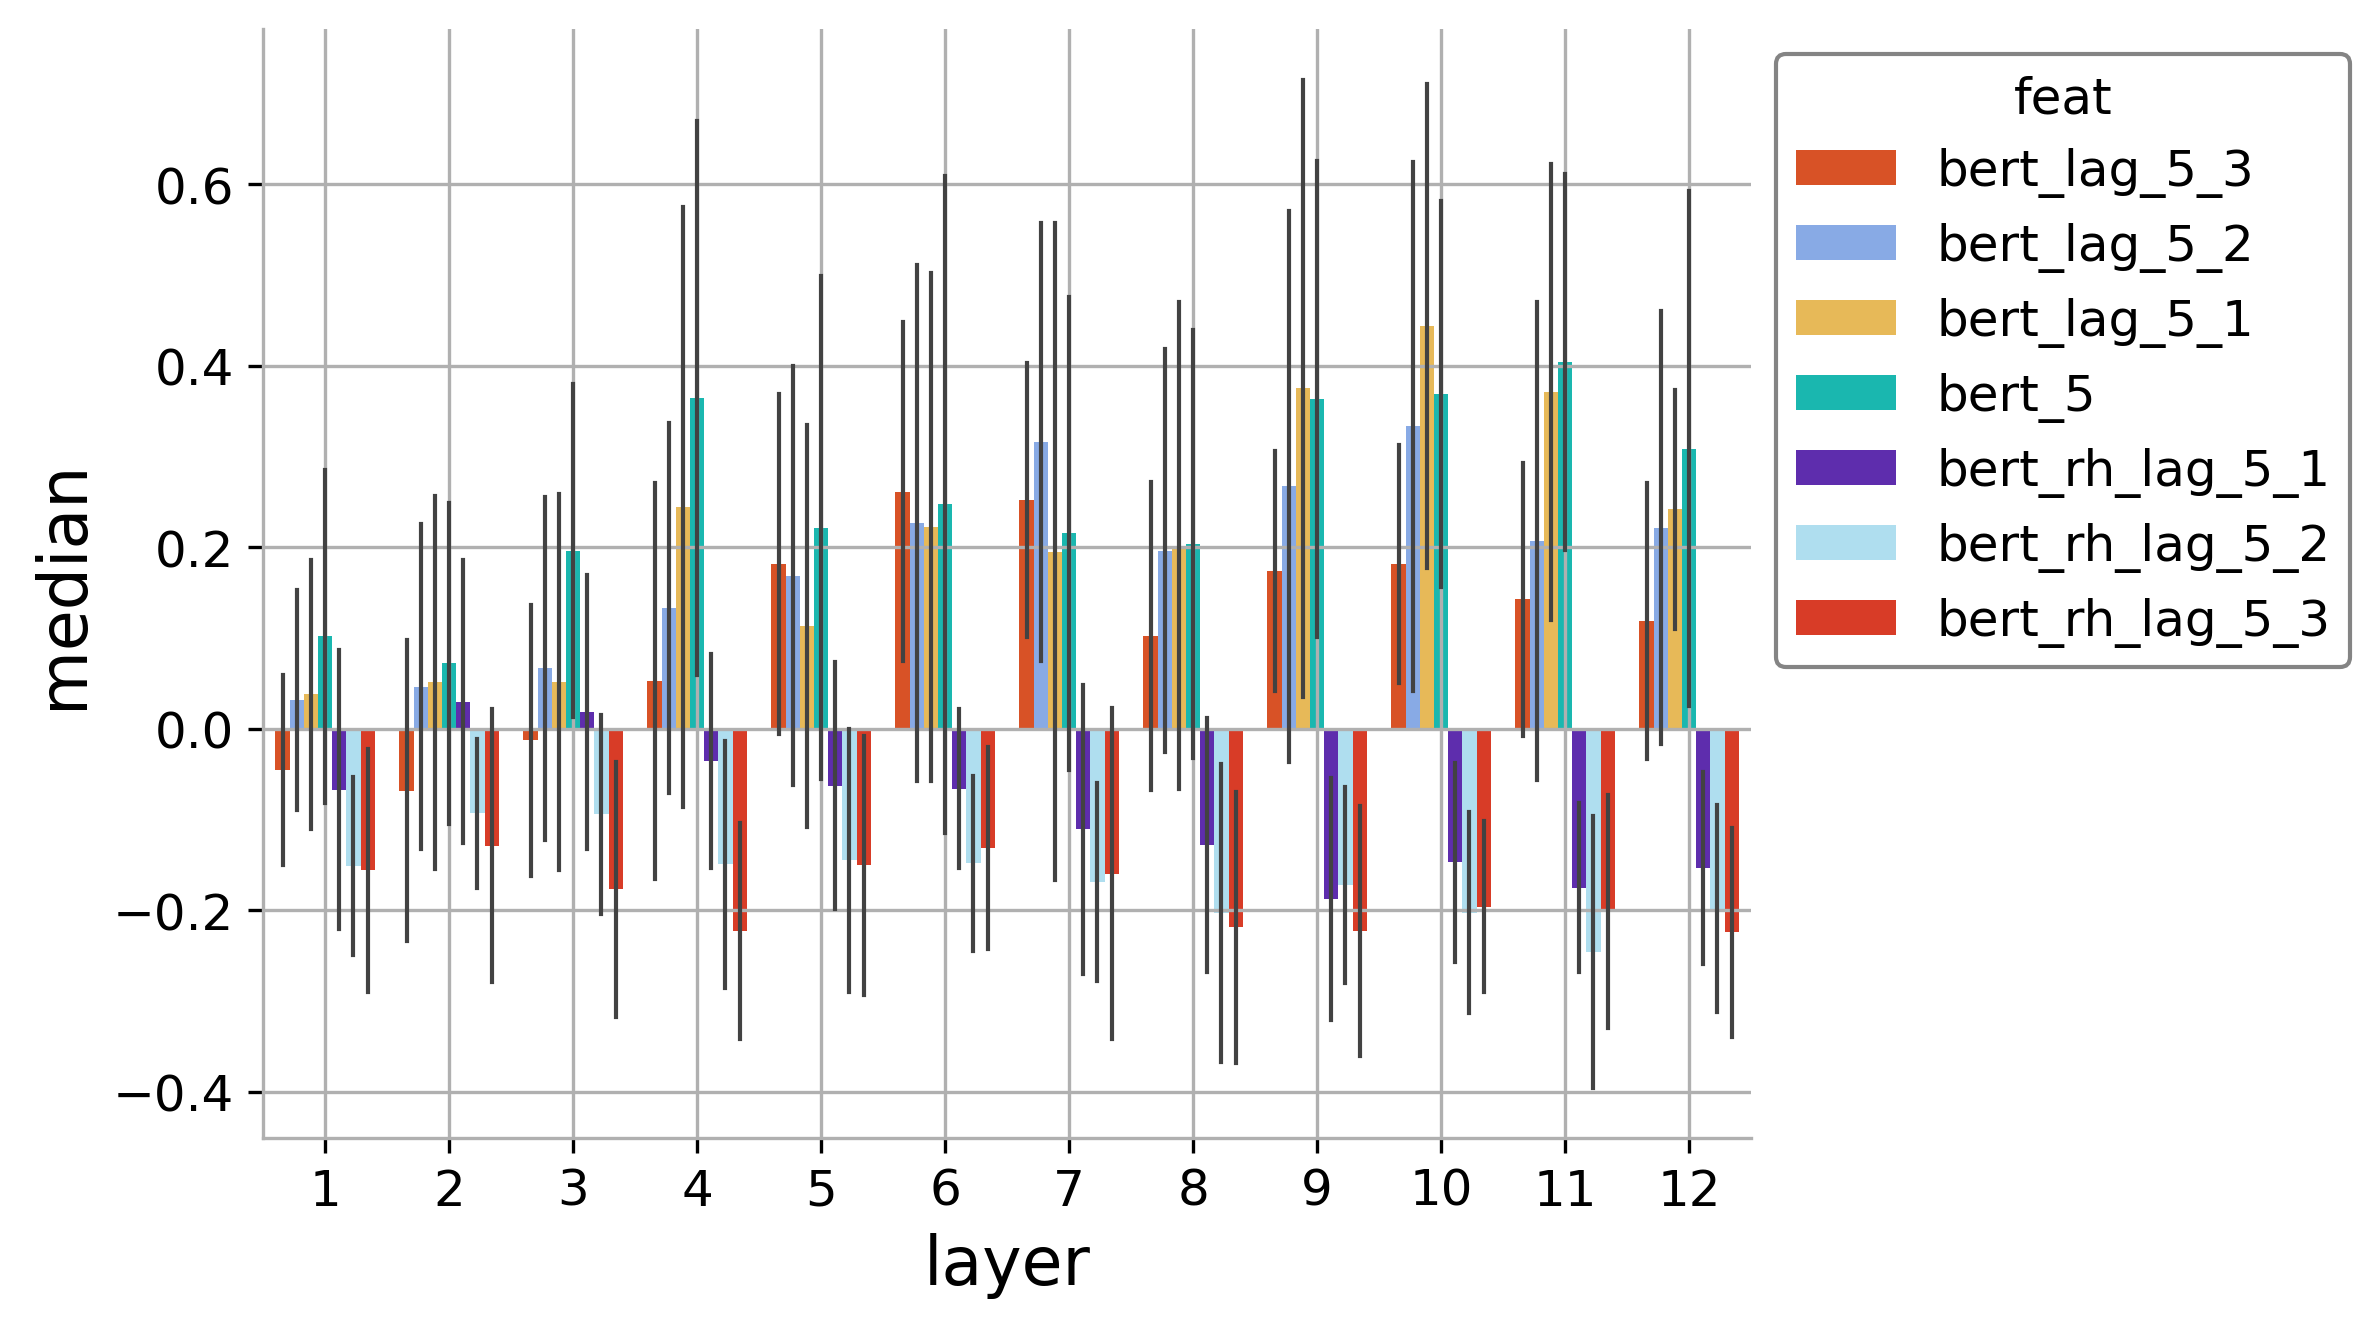

In [48]:
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x=mdf["layer"]+1, y="median", hue="feat", dodge=True, data=mdf, estimator=np.median, errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid()
plt.savefig("figures/sig_median_corr_bert-lag_layerwise.png", bbox_inches="tight")
plt.savefig("figures/sig_median_corr_bert-lag_layerwise.pdf", bbox_inches="tight")
plt.show()

In [16]:
for i in np.arange(3,28):
    if i < 10:
        os.mkdir('sub-0'+str(i))
    else:
        os.mkdir('sub-'+str(i))

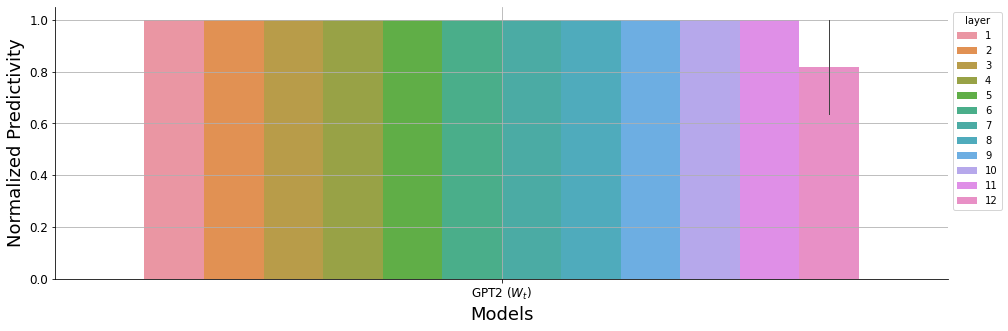

In [31]:
plt.figure(figsize=(16,5))
newdf = mdf[ (mdf.feat=='GPT2 ($W_{t}$)') ]
newdf = newdf.sort_values(by = "feat")
mas = scipy.stats.median_abs_deviation
med = np.median
error = lambda x: (-mas(x) + med(x), mas(x) + med(x))
ax = sns.barplot(x="feat", y="median", hue=newdf["layer"]+1, dodge=True, data=newdf, estimator=med,errorbar=error, errwidth=1)
sns.despine()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Models', ylabel='Normalized Predictivity')
ax.xaxis.label.set_size(18)
ax.yaxis.label.set_size(18)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
plt.grid()
#plt.savefig("figures/sig_median_corr_sslmodels_context_previous.png", bbox_inches="tight")
#plt.savefig("figures/sig_median_corr_sslmodels_context_previous.pdf", bbox_inches="tight")
plt.show()